In [3]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('white')
palette = 'magma'
%matplotlib inline

# Step 9. 2D Laplace equation

Laplace's equation is an important PDE in physics that is used to describe equilibrium states, for example in thermodynamics. In two spatial dimensions the equation is defined as follows:

$$
\begin{align}
\frac{\delta^2 p}{\delta x^2} + \frac{\delta^2 p}{\delta y^2} &= 0 \\
\end{align}
$$

This equation can be condensed using *nabla* notation, and in fact the operator $\nabla^2$ is also called the *Laplace operator*. 

$$
\begin{align}
\nabla^2 p &= 0
\end{align}
$$

Note that the implicit function $p(x,y)$ defined by this PDE is time-independent. The Laplace equation defines the equilibrium state of a system such that it does not change with time. We know how to approximate the second derivative now, so just subsitute and rearrange to solve for $p(x,y)$.

$$
\begin{align}
\frac{p(x + \Delta x,y) - 2 p(x,y) + p(x - \Delta x,y)}{\Delta x^2} &+ \frac{p(x,y + \Delta y) - 2 p(x,y) + p(x,y - \Delta y)}{\Delta y^2} = 0 \\
\Delta y^2 [p(x + \Delta x,y) - 2 p(x,y) + p(x - \Delta x,y)] &+ \Delta x^2 [p(x,y + \Delta y) - 2 p(x,y) 2 p(x,y) = p(x,y - \Delta y)] = 0 \\
2\Delta x^2 p(x,y) + 2\Delta y^2 p(x,y) &= \Delta y^2 [p(x + \Delta x,y) + p(x - \Delta x,y)] + \Delta x^2 [p(x,y + \Delta y) + p(x,y - \Delta y)] \\
2(\Delta x^2 + \Delta y^2) p(x,y) &= \Delta y^2 [p(x + \Delta x,y) + p(x - \Delta x,y)] + \Delta x^2 [p(x,y + \Delta y) + p(x,y - \Delta y)] \\
p(x,y) &= \frac{\Delta y^2 [p(x + \Delta x,y) + p(x - \Delta x,y)] + \Delta x^2 [p(x,y + \Delta y) + p(x,y - \Delta y)]}{2(\Delta x^2 + \Delta y^2)}
\end{align}
$$

The resulting equation defines the function $p(x,y)$ in terms of its neighboring values, but since there is no time dependence, we have a circular definition. To find this equilibrium state, we need to use an iterative approach where we keep updating the values of $p$ until they converge. We will compute this operation using central differences (a *five-point difference* operator) to obtain the finite difference solver.

$$
\begin{align}
p_{n+1,i,j} &= \frac{\Delta y^2 (p_{n,i+1,j} + p_{n,i-1,j}) + \Delta x^2 (p_{n,i,j+1} + p_{n,i,j-1})}{2(\Delta x^2 + \Delta y^2)}
\end{align}
$$

Intuitively, this finite difference solver is repeatedly updating each grid value with a weighted average of its neighbors. The equilibrium state is reached when the values stop changing, i.e. each grid value *is* a weighted average of its neighbors.

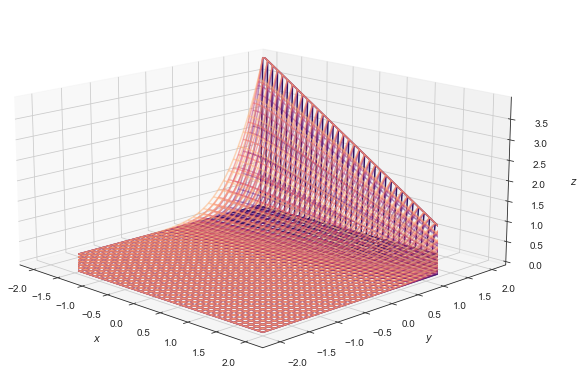

In [14]:
# 2D Laplace equation
n_x = 81
n_y = 81
n_t = 500 # number of iterations

dx = 4 / (n_x - 1)
dy = 4 / (n_y - 1)
# no time resolution

mod = 100

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x) - 2
y = np.linspace(0, (n_y-1)*dy, n_y) - 2

# initial/boundary conditions
p = np.zeros((n_t, n_x, n_y))
p[0,:,0] = 0
p[0,:,-1] = 2-y
p[0,0,:] = p[0,1,:]
p[0,-1,:] = p[0,-2,:]

fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig, auto_add_to_figure=False)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.5, 1.5, 1, 1]))
fig.add_axes(ax)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, p[0].T, color=next(colors), alpha=1.0)

for n in range(1, n_t):
    p[n,1:-1,1:-1] = (
        dy**2 * (p[n-1,2:,1:-1] + p[n-1,:-2,1:-1]) +
        dx**2 * (p[n-1,1:-1,2:] + p[n-1,1:-1,:-2])
    ) / (2*(dx**2 + dy**2))
    
    # need to reset boundary conditions
    p[n,:,0] = 0
    p[n,:,-1] = 2-y
    p[n,0,:] = p[n,1,:]
    p[n,-1,:] = p[n,-2,:]

    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, p[n].T, color=next(colors), alpha=0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(15, -45)

# Step 10. 2D Poisson's equation

Poisson's equation is the result of adding a *source* term to the right-hand-side of Laplace's equation:

$$
\begin{align}
\frac{\delta^2 p}{\delta x^2} + \frac{\delta^2 p}{\delta y^2} &= b
\end{align}
$$

Using *nabla* notation this can be condensed to the following:

$$
\begin{align}
\nabla p &= b
\end{align}
$$

The derivation is almost identical to Laplace's equation.

$$
\begin{align}
\frac{p(x + \Delta x,y) - 2 p(x,y) + p(x - \Delta x,y)}{\Delta x^2} &+ \frac{p(x,y + \Delta y) - 2 p(x,y) + p(x,y - \Delta y)}{\Delta y^2} = b(x,y) \\
\Delta y^2 [p(x + \Delta x,y) - 2 p(x,y) + p(x - \Delta x,y)] &+ \Delta x^2 [p(x,y + \Delta y) - 2 p(x,y) 2 p(x,y) = p(x,y - \Delta y)] = b(x,y) \Delta x^2 \Delta y^2 \\
2\Delta x^2 p(x,y) + 2\Delta y^2 p(x,y) &= \Delta y^2 [p(x + \Delta x,y) + p(x - \Delta x,y)] + \Delta x^2 [p(x,y + \Delta y) + p(x,y - \Delta y)] + b(x,y) \Delta x^2 \Delta y^2 \\
2(\Delta x^2 + \Delta y^2) p(x,y) &= \Delta y^2 [p(x + \Delta x,y) + p(x - \Delta x,y)] + \Delta x^2 [p(x,y + \Delta y) + p(x,y - \Delta y)] + b(x,y) \Delta x^2 \Delta y^2 \\
p(x,y) &= \frac{\Delta y^2 [p(x + \Delta x,y) + p(x - \Delta x,y)] + \Delta x^2 [p(x,y + \Delta y) + p(x,y - \Delta y)] + b(x,y) \Delta x^2 \Delta y^2 }{2(\Delta x^2 + \Delta y^2)}
\end{align}
$$

Then convert to the finite difference solver.

$$
\begin{align}
p_{n+1,i,j} &= \frac{\Delta y^2 (p_{n,i+1,j} + p_{n,i-1,j}) + \Delta x^2 (p_{n,i,j+1} + p_{n,i,j-1}) + b_{n,i,j} \Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}
\end{align}
$$

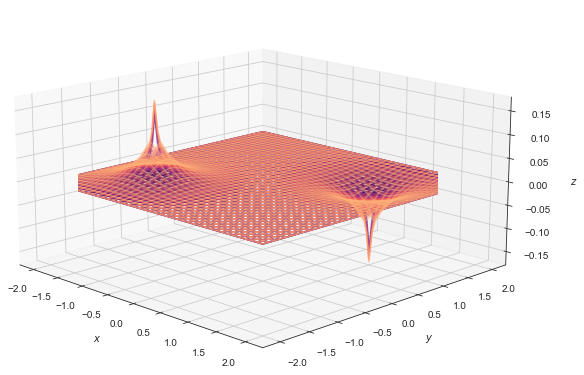

In [72]:
# 2D Poisson equation
n_x = 81
n_y = 81
n_t = 500 # number of iterations

dx = 4 / (n_x - 1)
dy = 4 / (n_y - 1)
# no time resolution

mod = 100

c = 1.0 # the wave speed

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x) - 2
y = np.linspace(0, (n_y-1)*dy, n_y) - 2

# initial conditions and source
p = np.zeros((n_t, n_x, n_y))
b = np.zeros((n_x, n_y))
b[int(n_x/4),int(n_y/4)] = 100
b[int(3*n_x/4),int(3*n_y/4)] = -100

fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig, auto_add_to_figure=False)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.5, 1.5, 1, 1]))
fig.add_axes(ax)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, p[0].T, color=next(colors), alpha=1.0)

for n in range(1, n_t):
    p[n,1:-1,1:-1] = (
        dy**2 * (p[n-1,2:,1:-1] + p[n-1,:-2,1:-1]) +
        dx**2 * (p[n-1,1:-1,2:] + p[n-1,1:-1,:-2]) +
        b[1:-1,1:-1] * dx**2 * dy**2
    ) / (2*(dx**2 + dy**2))

    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, p[n].T, color=next(colors), alpha=0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(15, -45)

# Step 11. Navier-Stokes equation for cavity flow

We will now turn to the Navier-Stokes equation in two spatial dimensions. The momentum equation for a velocity field $v$ is defined as the following:

$$
\begin{align}
\frac{\delta \vec{v}}{\delta t} + (\vec{v} \cdot \nabla)\vec{v} &= -\frac{1}{\rho} \nabla p + \nu \nabla^2 \vec{v}
\end{align}
$$

This represents a scalar equation for each velocity component $\vec{v} = [u,v]$. The $\nabla$ operator in this context can be interpreted as a vector of partial derivative operators with respect to spatial components:

$$
\begin{align}
\nabla &= \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right]
\end{align}
$$

Using the context of the above equation, it can be applied in various ways:

$$
\begin{align}
\nabla p &= \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right] p = \left[ \frac{\delta p}{\delta x}, \frac{\delta p}{\delta y} \right] = \text{grad}\, p \\
\nabla^2 \vec{v} &= \left( \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right] \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right]^T \right) [u,v] = \left( \frac{\delta^2} {\delta x^2} + \frac{\delta^2}{\delta y^2} \right) [u,v] = \left[ \frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2}, \frac{\delta^2 v}{\delta x^2} + \frac{\delta^2 v}{\delta y^2} \right] \\
&= \text{div}\, (\text{grad}\, \vec{v}) \\
\nabla \cdot \vec{v} &= \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right] [u, v]^T = \frac{\delta u}{\delta x} + \frac{\delta v}{\delta y} = \text{div}\, \vec{v} \\
(\vec{v} \cdot \nabla) \vec{v} &= \left( [u, v] \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right]^T \right) [u, v] = \left( u \frac{\delta}{\delta x} + v \frac{\delta}{\delta y} \right) [u,v] = \left( u \frac{\delta u}{\delta x} + v \frac{\delta u}{\delta y}, u \frac{\delta v}{\delta x} + v \frac{\delta v}{\delta y} \right) \\
\end{align}
$$

Note that the $\nabla$ operator is *not commutative*. Now let's break the Navier Stokes equation into the component scalar equations of $\vec{v}$.

$$
\begin{align}
\frac{\delta u}{\delta t} + \left( u \frac{\delta u}{\delta x} + v \frac{\delta u}{\delta y} \right) &= -\frac{1}{\rho} \frac{\delta p}{\delta x} + \nu \left( \frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2} \right) \\
\frac{\delta v}{\delta t} + \left( u \frac{\delta v}{\delta x} + v \frac{\delta v}{\delta y} \right) &= -\frac{1}{\rho} \frac{\delta p}{\delta y} + \nu \left( \frac{\delta^2 v}{\delta x^2} + \frac{\delta^2 v}{\delta y^2} \right)
\end{align}
$$

And we also have a scalar pressure equation $p$ (I was actually given the longhand version of this, and I tried to convert to the shorthand form by using the previous definitions, for practice).

$$
\begin{align}
\nabla^2 p &= -\rho (\nabla \cdot \vec{v})^2 \\
\left( \frac{\delta^2} {\delta x^2} + \frac{\delta^2}{\delta y^2} \right) p &= -\rho \left( \left[ \frac{\delta}{\delta x}, \frac{\delta}{\delta y} \right] [u,v]^T \right)^2 \\
\frac{\delta^2 p}{\delta x^2} + \frac{\delta^2 p}{\delta y^2} &= -\rho \left( \frac{\delta u}{\delta x} + \frac{\delta v}{\delta y} \right)^2 \\
\frac{\delta^2 p}{\delta x^2} + \frac{\delta^2 p}{\delta y^2} &= -\rho \left( \frac{\delta u}{\delta x} \frac{\delta u}{\delta x} + 2 \frac{\delta u}{\delta x} \frac{\delta v}{\delta y} + \frac{\delta v}{\delta y} \frac{\delta v}{\delta y} \right) \\
&\ldots \text{I doubt this step is correct, but don't see how else to simplify.} \\
\frac{\delta^2 p}{\delta x^2} + \frac{\delta^2 p}{\delta y^2} &= -\rho \left( \frac{\delta u}{\delta x} \frac{\delta u}{\delta x} + 2 \frac{\delta u}{\delta y} \frac{\delta v}{\delta x} + \frac{\delta v}{\delta y} \frac{\delta v}{\delta y} \right)
\end{align}
$$

We can now create our finite difference solver. We will avoid expanding out the finite differences $\Delta u$, for brevity.

$$
\begin{align}
\frac{\Delta u}{\Delta t} &+ u \frac{\Delta u}{\Delta x} + v \frac{\Delta u}{\Delta y}  = -\frac{1}{\rho} \frac{\Delta p}{\Delta x} + \nu \left( \frac{\Delta^2 u}{\Delta x^2} + \frac{\Delta^2 u}{\Delta y^2} \right) \\
\frac{\Delta u}{\Delta t} &= - u \frac{\Delta u}{\Delta x} - v \frac{\Delta u}{\Delta y} - \frac{1}{\rho} \frac{\Delta p}{\Delta x} + \nu \left( \frac{\Delta^2 u}{\Delta x^2} + \frac{\Delta^2 u}{\Delta y^2} \right) \\
\Delta u &= -u \Delta u \frac{\Delta t}{\Delta x} - v \Delta u \frac{\Delta t}{\Delta y} - \frac{1}{\rho} \Delta p \frac{\Delta t}{\Delta x} + \nu \left( \Delta^2 u \frac{\Delta t}{\Delta x^2} + \Delta^2 u \frac{\Delta t}{\Delta y^2} \right) \\
u_{n+1,i,j} &= u_{n,i,j} - u_{n,i,j} (u_{n,i,j} - u_{n,i-1,j}) \frac{\Delta t}{\Delta x} - v_{n,i,j} (u_{n,i,j} - u_{n,i,j-1}) \frac{\Delta t}{\Delta y} - \frac{1}{2\rho} (p_{n,i+1,j} - p_{n,i-1,j}) \frac{\Delta t}{\Delta x} + \nu \left[ (u_{n,i+1,j} - 2 u_{n,i,j} + _{n,i-1,j}) \frac{\Delta t}{\Delta x^2} + (u_{n,i,j+1} - 2 u_{n,i,j} + u_{n,i,j-1}) \frac{\Delta t}{\Delta y^2} \right]
\end{align}
$$

The derivation for $v$ is analgous.

$$
\begin{align}
\frac{\Delta v}{\Delta t} &+ u \frac{\Delta v}{\Delta x} + v \frac{\Delta v}{\Delta y} = -\frac{1}{\rho} \frac{\Delta p}{\Delta y} + \nu \left( \frac{\Delta^2 v}{\Delta x^2} + \frac{\Delta^2 v}{\Delta y^2} \right) \\
\frac{\Delta v}{\Delta t} &= - u \frac{\Delta v}{\Delta x} - v \frac{\Delta v}{\Delta y} - \frac{1}{\rho} \frac{\Delta p}{\Delta y} + \nu \left( \frac{\Delta^2 v}{\Delta x^2} + \frac{\Delta^2 v}{\Delta y^2} \right) \\
\Delta v &= - u \Delta v \frac{\Delta t}{\Delta x} - v \Delta v \frac{\Delta t}{\Delta y} - \frac{1}{\rho} \Delta p \frac{\Delta t}{\Delta y} + \nu \left( \Delta^2 v \frac{\Delta t}{\Delta x^2} + \Delta^2 v \frac{\Delta t}{\Delta y^2} \right) \\
v_{n+1,i,j} &= v_{n,i,j} - u_{n,i,j} (v_{n,i,j} - v_{n,i-1,j}) \frac{\Delta t}{\Delta x} - v_{n,i,j} (v_{n,i,j} - v_{n,i,j-1}) \frac{\Delta t}{\Delta y} - \frac{1}{2\rho} (p_{n,i,j+1} - p_{n,i,j-1}) \frac{\Delta t}{\Delta y} + \nu \left[ (v_{n,i+1,j} - 2 v_{n,i,j} + v_{n,i-1,j}) \frac{\Delta t}{\Delta x^2} + (v_{n,i,j+1} - 2 v_{n,i,j} + v_{n,i,j-1}) \frac{\Delta t}{\Delta y^2} \right] \\
\end{align}
$$

And finally, we need to discretize the pressure equation. First the $x$ direction:

$$
\begin{align}
\frac{\Delta^2 p}{\Delta x^2} + \frac{\Delta^2 p}{\Delta y^2} &= -\rho \left[ \left(\frac{\Delta u}{\Delta x}\right)^2 + 2 \frac{\Delta u}{\Delta y} \frac{\Delta v}{\Delta x} + \left( \frac{\Delta v}{\Delta y} \right)^2 \right] \\
\frac{p_{n,i+1,j} - 2 p_{n,i,j} + p_{n,i-1,j}}{\Delta x^2} + \frac{p_{n,i,j+1} - 2 p_{n,i,j} + p_{n,i,j-1}}{\Delta y^2} &= -\rho \left[ \left(\frac{u_{n,i+1,j} - u_{n,i-1,j}}{2 \Delta x}\right)^2 + 2 \frac{u_{n,i,j+1} - u_{n,i,j-1}}{2 \Delta y} \frac{v_{n,i+1,j} - v_{n,i-1,j}}{2 \Delta x} + \left( \frac{v_{n,i,j+1} - v_{n,i,j-1}}{2 \Delta y} \right)^2 \right] \\
\end{align}
$$

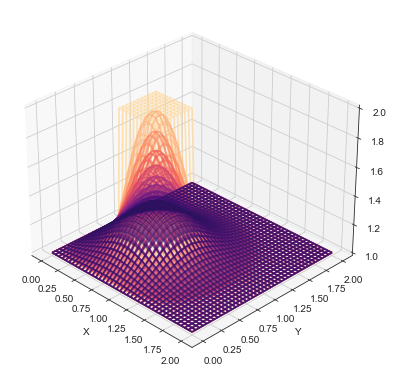

In [33]:
# 2D diffusion
n_t = 100
n_x = 41
n_y = 41

dx = 2 / (n_x - 1)
dy = 2 / (n_y - 1)
sigma = 0.05
dt = sigma * dx

mod = 10

v = 0.25 # the viscosity

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod+1))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)
y = np.linspace(0, (n_y-1)*dy, n_y)

# initial conditions
u = np.ones((n_t, n_x, n_y))
u[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0

fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, u[0], color=next(colors), alpha=0.5)

for n in range(1, n_t):
    u[n,1:-1,1:-1] = (
        u[n-1,1:-1,1:-1]
        + v*(u[n-1,2:,1:-1] - 2*u[n-1,1:-1,1:-1] + u[n-1,:-2,1:-1])*dt/dx**2
        + v*(u[n-1,1:-1,2:] - 2*u[n-1,1:-1,1:-1] + u[n-1,1:-1,:-2])*dt/dy**2
    )
    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, u[n], color=next(colors), alpha=0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(15, -45)

# Step 8. Burger's equation

Now we will extend Burger's equation to observe both nonlinear convection and diffusion in two spatial dimensions. (I don't understand the introduction of new funcition $v$ and coupled PDE?)

$$
\begin{align}
\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} + v \frac{\delta u}{\delta y} &= \nu \left( \frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2} \right) \\
\frac{\delta v}{\delta t} + u \frac{\delta v}{\delta x} + v \frac{\delta v}{\delta y} &= \nu \left( \frac{\delta^2 v}{\delta x^2} + \frac{\delta^2 v}{\delta y^2} \right)
\end{align}
$$

Substitute the derivatives and solve for the next time step of each coupled term. First, we will solve for $u$.

$$
\begin{align}
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &+ u(t,x,y) \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} + v(t,x,y) \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} = \nu \frac{u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)}{\Delta y^2} \\
\frac{u(t + \Delta t,x,y) - u(t,x,y)}{\Delta t} &= -u(t,x,y) \frac{u(t,x + \Delta x,y) - u(t,x,y)}{\Delta x} - v(t,x,y) \frac{u(t,x,y + \Delta y) - u(t,x,y)}{\Delta y} + \nu \frac{u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)}{\Delta y^2} \\
u(t + \Delta t,x,y) - u(t,x,y) &= -u(t,x,y) [u(t,x + \Delta x,y) - u(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [u(t,x,y + \Delta y) - u(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2} \\
u(t + \Delta t,x,y) = u(t,x,y) &- u(t,x,y) [u(t,x + \Delta x,y) - u(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [u(t,x,y + \Delta y) - u(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [u(t,x + \Delta x,y) - 2 u(t,x,y) + u(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [u(t,x,y + \Delta y) - 2 u(t,x,y) + u(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2}
\end{align}
$$

Then, solve for $v$.

$$
\begin{align}
\frac{v(t + \Delta t,x,y) - v(t,x,y)}{\Delta t} &+ u(t,x,y) \frac{v(t,x + \Delta x,y) - v(t,x,y)}{\Delta x} + v(t,x,y) \frac{v(t,x,y + \Delta y) - v(t,x,y)}{\Delta y} = \nu \frac{v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)}{\Delta y^2} \\
\frac{v(t + \Delta t,x,y) - v(t,x,y)}{\Delta t} &= -u(t,x,y) \frac{v(t,x + \Delta x,y) - v(t,x,y)}{\Delta x} - v(t,x,y) \frac{v(t,x,y + \Delta y) - v(t,x,y)}{\Delta y} + \nu \frac{v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)}{\Delta x^2} + \nu \frac{v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)}{\Delta y^2} \\
v(t + \Delta t,x,y) - v(t,x,y) &= -u(t,x,y) [v(t,x + \Delta x,y) - v(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [v(t,x,y + \Delta y) - v(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2} \\
v(t + \Delta t,x,y) = v(t,x,y) &- u(t,x,y) [v(t,x + \Delta x,y) - v(t,x,y)] \frac{\Delta t}{\Delta x} - v(t,x,y) [v(t,x,y + \Delta y) - v(t,x,y)] \frac{\Delta t}{\Delta y} + \nu [v(t,x + \Delta x,y) - 2 v(t,x,y) + v(t,x - \Delta x,y)] \frac{\Delta t}{\Delta x^2} + \nu [v(t,x,y + \Delta y) - 2 v(t,x,y) + v(t,x,y - \Delta y)] \frac{\Delta t}{\Delta y^2}
\end{align}
$$


Now we can convert to the finite difference solver equations:
$$
\begin{align}
u_{n+1,i,j} &= u_{n,i,j} - u_{n,i,j} [u_{n,i,j} - u_{n,i-1,j}] \frac{\Delta t}{\Delta x} - v_{n,i,j} [u_{n,i,j} - u_{n,i,j-1}] \frac{\Delta t}{\Delta y} + \nu [u_{n,i+1,j} - 2 u_{n,i,j} + u_{n,i-1,j}] \frac{\Delta t}{\Delta x^2} + \nu [u_{n,i,j+1} - 2 u_{n,i,j} + u_{n,i,j-1}] \frac{\Delta t}{\Delta y^2} \\
v_{n+1,i,j} &= v_{n,i,j} - u_{n,i,j} [v_{n,i,j} - v_{n,i-1,j}] \frac{\Delta t}{\Delta x} - v_{n,i,j} [v_{n,i,j} - v_{n,i,j-1}] \frac{\Delta t}{\Delta y} + \nu [v_{n,i+1,j} - 2 v_{n,i,j} + v_{n,i-1,j}] \frac{\Delta t}{\Delta x^2} + \nu [v_{n,i,j+1} - 2 v_{n,i,j} + v_{n,i,j-1}] \frac{\Delta t}{\Delta y^2}
\end{align}
$$

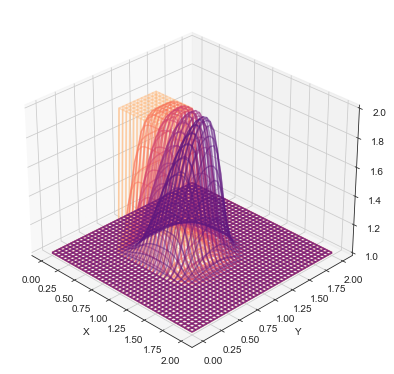

In [42]:
# 2D Burger's equation (coupled)
n_t = 100
n_x = 41
n_y = 41

c = 1.0 # the wave speed
nu = 0.001 # the viscosity

dx = 2 / (n_x - 1)
dy = 2 / (n_y - 1)
sigma = 0.0009
dt = sigma * dx * dy / nu

mod = 20

# color by time step
colors = iter(sns.color_palette(palette, n_t//mod+1))

# spatial grid points
x = np.linspace(0, (n_x-1)*dx, n_x)
y = np.linspace(0, (n_y-1)*dy, n_y)

# initial conditions
u = np.ones((n_t, n_x, n_y))
v = np.ones((n_t, n_x, n_y))
u[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0
v[0,int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2.0

fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
X, Y = np.meshgrid(x, y)
surf = ax.plot_wireframe(X, Y, u[0], color=next(colors), alpha=0.5)

for n in range(1, n_t):
    u[n,1:-1,1:-1] = (
        u[n-1,1:-1,1:-1]
        - u[n-1,1:-1,1:-1]*(u[n-1,1:-1,1:-1] - u[n-1,:-2,1:-1])*dt/dx
        - v[n-1,1:-1,1:-1]*(u[n-1,1:-1,1:-1] - u[n-1,1:-1,:-2])*dt/dy
        + nu*(u[n-1,2:,1:-1] - 2*u[n-1,1:-1,1:-1] + u[n-1,:-2,1:-1])*dt/dx**2
        + nu*(u[n-1,1:-1,2:] - 2*u[n-1,1:-1,1:-1] + u[n-1,1:-1,:-2])*dt/dy**2
    )
    v[n,1:-1,1:-1] = (
        v[n-1,1:-1,1:-1]
        - u[n-1,1:-1,1:-1]*(v[n-1,1:-1,1:-1] - v[n-1,:-2,1:-1])*dt/dx
        - v[n-1,1:-1,1:-1]*(v[n-1,1:-1,1:-1] - v[n-1,1:-1,:-2])*dt/dy
        + nu*(v[n-1,2:,1:-1] - 2*v[n-1,1:-1,1:-1] + v[n-1,:-2,1:-1])*dt/dx**2
        + nu*(v[n-1,1:-1,2:] - 2*v[n-1,1:-1,1:-1] + v[n-1,1:-1,:-2])*dt/dy**2
    )
    if n%mod == 0:
        surf = ax.plot_wireframe(X, Y, u[n], color=next(colors), alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.view_init(30, -45)